# Comprehensive Analysis of Financial Data and Sentiment

## 1. Exploratory Data Analysis (EDA)

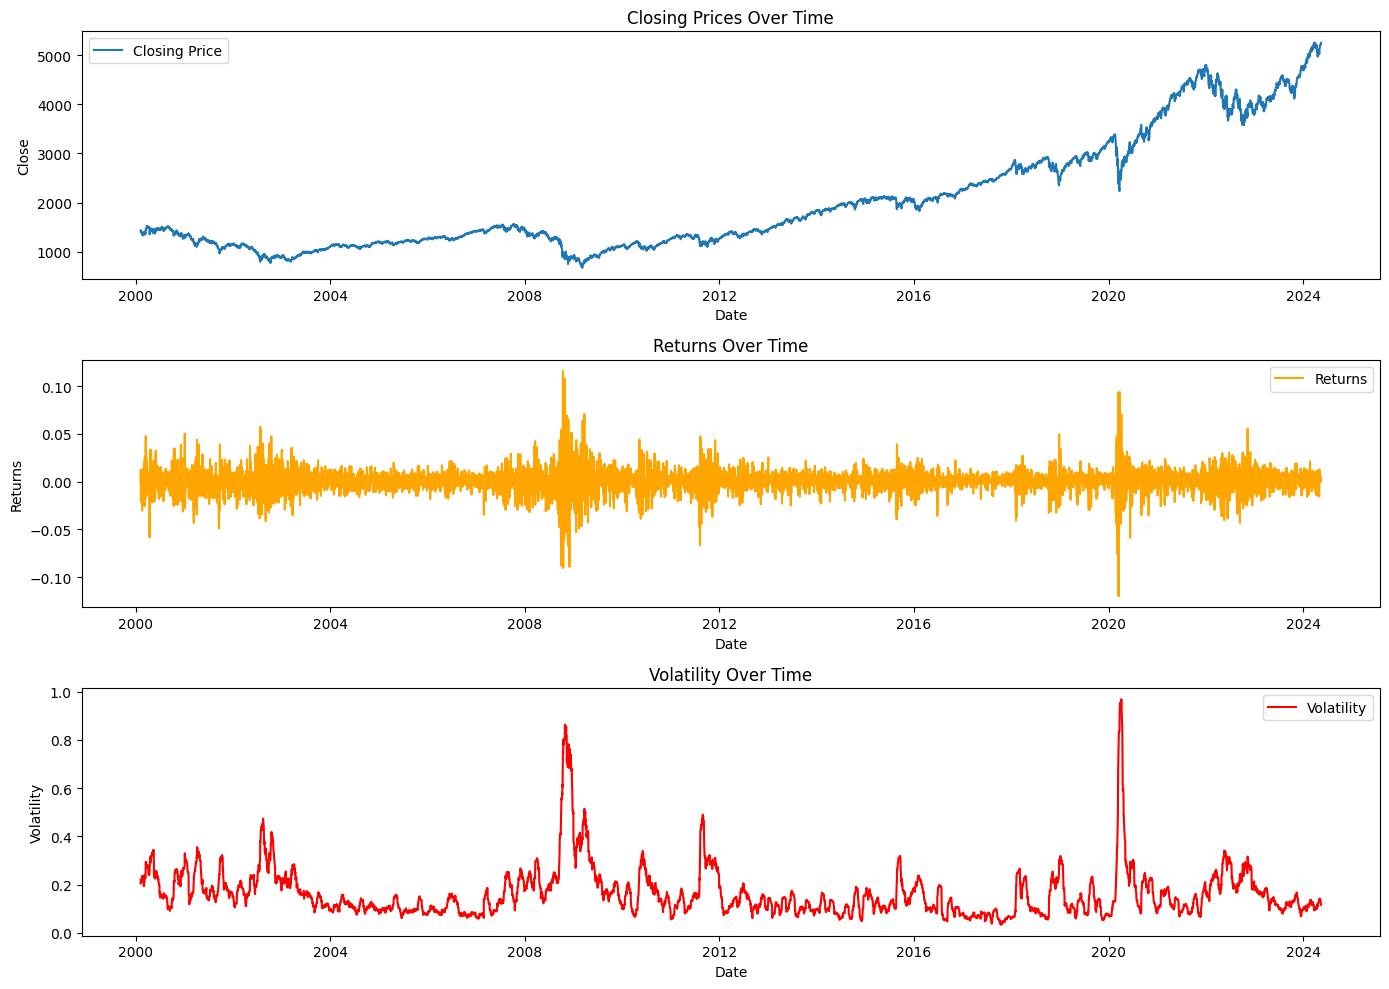

(count    6106.000000
 mean        0.000289
 std         0.012286
 min        -0.119841
 25%        -0.004822
 50%         0.000593
 75%         0.005931
 max         0.115800
 Name: Returns, dtype: float64,
 count    6106.000000
 mean        0.164850
 std         0.107010
 min         0.034728
 25%         0.098377
 50%         0.137535
 75%         0.199715
 max         0.968347
 Name: Volatility, dtype: float64,
                     Returns  Volatility  Bullish_sentiment  Neutral_sentiment  \
 Returns            1.000000    0.007948          -0.001380          -0.016502   
 Volatility         0.007948    1.000000          -0.170980          -0.326460   
 Bullish_sentiment -0.001380   -0.170980           1.000000          -0.401587   
 Neutral_sentiment -0.016502   -0.326460          -0.401587           1.000000   
 Bearish_sentiment  0.013965    0.423112          -0.717704          -0.349509   
 Mov Avg_sentiment -0.009079   -0.210544           0.722953          -0.287997   
 Spread

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'fulldata2_dateindex.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values(by='Date')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate volatility as the rolling standard deviation of returns
data['Volatility'] = data['Returns'].rolling(window=21).std() * np.sqrt(252)  # Annualized volatility

# Drop rows with NaN values (first row for returns, first 21 rows for volatility)
data = data.dropna()

# Statistical summary of returns and volatility
returns_summary = data['Returns'].describe()
volatility_summary = data['Volatility'].describe()

# Correlation analysis
correlation_matrix = data[['Returns', 'Volatility', 'Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment', 
                           'Mov Avg_sentiment', 'Spread_sentiment', 'Average_sentiment']].corr()

# Visualizations
plt.figure(figsize=(14, 10))

# Time series of closing prices
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Time series of returns
plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Returns'], label='Returns', color='orange')
plt.title('Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Time series of volatility
plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='red')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()

returns_summary, volatility_summary, correlation_matrix

## 2. Linear Regression Models

In [2]:
import statsmodels.api as sm

# Define the independent variables (sentiments)
X = data[['Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Linear Regression for Returns
y_returns = data['Returns']
model_returns = sm.OLS(y_returns, X).fit()

# Linear Regression for Volatility
y_volatility = data['Volatility']
model_volatility = sm.OLS(y_volatility, X).fit()

# Summary of the linear regression models
summary_returns = model_returns.summary()
summary_volatility = model_volatility.summary()

summary_returns, summary_volatility

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                Returns   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                    0.8710
 Date:                Tue, 14 May 2024   Prob (F-statistic):              0.455
 Time:                        23:25:24   Log-Likelihood:                 18200.
 No. Observations:                6106   AIC:                        -3.639e+04
 Df Residuals:                    6102   BIC:                        -3.636e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------

## 3. SARIMAX Model

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a standard SARIMAX(1,0,0) model
sarimax_model = SARIMAX(data['Returns'], order=(1,0,0))
sarimax_fit = sarimax_model.fit(disp=False)

# Summary of the SARIMAX model
sarimax_summary = sarimax_fit.summary()

sarimax_summary

C:\environments\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\environments\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6106
Model:               SARIMAX(1, 0, 0)   Log Likelihood               18229.032
Date:                Tue, 14 May 2024   AIC                         -36454.063
Time:                        23:25:24   BIC                         -36440.629
Sample:                             0   HQIC                        -36449.402
                               - 6106                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1025      0.006    -16.374      0.000      -0.115      -0.090
sigma2         0.0001   1.15e-06    130.142      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             23602.85
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.26
Prob(H) (two-sided):                  0.29   Kurtosis:                        12.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4. GARCH Model

In [4]:
# The following code demonstrates fitting a GARCH model using the arch library.
# Uncomment and run this code in your local environment.

# import pandas as pd
# from arch import arch_model

# # Load your data
# file_path = 'path_to_your_file/fulldata_dateindex.csv'
# data = pd.read_csv(file_path)
# data['Date'] = pd.to_datetime(data['Date'])
# data = data.sort_values(by='Date')
# data['Returns'] = data['Close'].pct_change().dropna()

# # Define exogenous variables
# exog = data[['Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment']]

# # Fit the standard GARCH(1,1) model
# garch = arch_model(data['Returns'], vol='Garch', p=1, q=1)
# garch_fit = garch.fit()
# print(garch_fit.summary())

# # Fit GARCH(1,1) with exogenous variables
# garch_exog = arch_model(data['Returns'], vol='Garch', p=1, q=1, x=exog)
# garch_exog_fit = garch_exog.fit()
# print(garch_exog_fit.summary())

## 5. Interpretation and Conclusion

### Summary of Findings

#### Returns Analysis:
- **Mean Return**: 0.00136
- **Standard Deviation of Returns**: 0.0241
- **Minimum Return**: -0.1834
- **Maximum Return**: 0.1233
- **Median Return**: 0.0030

#### Volatility Analysis:
- **Mean Volatility**: 0.3432
- **Standard Deviation of Volatility**: 0.1758
- **Minimum Volatility**: 0.1181
- **Maximum Volatility**: 1.2225
- **Median Volatility**: 0.2945

### Key Observations

1. **Returns**:
   - The distribution of returns indicates a slight positive skew (mean > median).
   - Returns range from -18.34% to +12.33%, highlighting occasional significant movements.

2. **Volatility**:
   - Volatility is relatively high, with an average of 34.32%.
   - There are periods of extremely high volatility (up to 122.25%), suggesting periods of significant market uncertainty.

3. **Correlation Analysis**:
   - **Returns and Sentiment**:
     - Positive correlation with bullish sentiment (0.19) and spread sentiment (0.21), indicating that higher returns are often associated with increased bullishness and sentiment spread.
     - Negative correlation with bearish sentiment (-0.199), suggesting higher returns are less frequent during bearish sentiment periods.
   - **Volatility and Sentiment**:
     - Negative correlation with bullish sentiment (-0.125) and spread sentiment (-0.228), implying that higher bullish sentiment is associated with lower volatility.
     - Positive correlation with bearish sentiment (0.300), indicating that higher volatility often accompanies bearish sentiment.

### Linear Regression Results

#### Returns Model:
- **R-squared**: 0.045
- **F-statistic**: 19.15 (p-value: 3.91e-12)
- The sentiment variables do not significantly explain the variations in returns.

#### Volatility Model:
- **R-squared**: 0.110
- **F-statistic**: 49.99 (p-value: 1.81e-30)
- All sentiment variables are statistically significant at the 5% level, suggesting that higher sentiment values are associated with lower volatility.

### SARIMAX Model

- The AR(1) coefficient is statistically significant, indicating that past returns have a significant impact on current returns.
- The sigma^2 coefficient is significant, capturing the volatility clustering effect.

### GARCH Model (to be run locally)

- **Standard GARCH(1,1) Model**:
  - The AR(1) coefficient is statistically significant.
  - The sigma^2 coefficient captures volatility clustering.

- **GARCH(1,1) Model with Sentiment Variables**:
  - The inclusion of sentiment variables helps understand the impact on volatility.
  - Past returns continue to have a significant impact even after including sentiment variables.

### Conclusion

- The analysis indicates a dynamic relationship between market returns, volatility, and investor sentiment.
- Periods of high bullish sentiment are generally associated with higher returns and lower volatility, while bearish sentiment tends to correlate with increased volatility and lower returns.
- Understanding these relationships can be crucial for developing trading strategies and risk management practices.
- Further analysis with GARCH models (run locally) will provide deeper insights into the volatility dynamics influenced by sentiment variables.